### AeroSonicDB (YPAD-0523): Dataset Summary

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_path = '../data/raw'
df = pd.read_csv(os.path.join(dataset_path, 'sample_meta.csv'))

In [3]:
df['%dur'] = df['duration'] / df['duration'].sum()

In [4]:
table = pd.pivot_table(df, 'duration', index=['class'], columns='fold', aggfunc=np.sum, margins=True, margins_name='TOTAL')
table = round(table / 60, 1)
table

fold,1,2,3,4,5,test,TOTAL
class,,,,,,,
0,29.2,20.3,36.4,32.5,39.8,52.8,211.1
1,88.2,91.0,87.0,85.8,91.8,88.4,532.3
TOTAL,117.3,111.4,123.5,118.3,131.6,141.3,743.4


In [5]:
print(table.to_latex(bold_rows=True))

\begin{tabular}{lrrrrrrr}
\toprule
\textbf{fold} &      1 &      2 &      3 &      4 &      5 &   test &  TOTAL \\
\textbf{class} &        &        &        &        &        &        &        \\
\midrule
\textbf{0    } &   29.2 &   20.3 &   36.4 &   32.5 &   39.8 &   52.8 &  211.1 \\
\textbf{1    } &   88.2 &   91.0 &   87.0 &   85.8 &   91.8 &   88.4 &  532.3 \\
\textbf{TOTAL} &  117.3 &  111.4 &  123.5 &  118.3 &  131.6 &  141.3 &  743.4 \\
\bottomrule
\end{tabular}



C:\Users\Blake\AppData\Local\Temp\ipykernel_12716\1539441251.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex(bold_rows=True))


In [6]:
loc_table = pd.crosstab(index=df['class'], columns=df['location'], values=df['duration'], aggfunc=np.sum, margins=True, margins_name='TOTAL', normalize=True)
loc_table = round(loc_table*100, 1)

In [7]:
print(loc_table.to_latex(bold_rows=True))

\begin{tabular}{lrrrr}
\toprule
\textbf{location} &     0 &    1 &    2 &  TOTAL \\
\textbf{class} &       &      &      &        \\
\midrule
\textbf{0    } &  27.1 &  0.3 &  1.0 &   28.4 \\
\textbf{1    } &  69.9 &  0.6 &  1.2 &   71.6 \\
\textbf{TOTAL} &  97.0 &  0.9 &  2.2 &  100.0 \\
\bottomrule
\end{tabular}



C:\Users\Blake\AppData\Local\Temp\ipykernel_12716\2449559566.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(loc_table.to_latex(bold_rows=True))


In [8]:
mic_table = pd.crosstab(index=df['class'], columns=df['mic'], values=df['duration'], aggfunc=np.sum, margins=True, margins_name='TOTAL', normalize=True)
mic_table = round(mic_table*100, 1)
mic_table

mic,0,1,TOTAL
class,,,
0,3.9,24.5,28.4
1,11.9,59.8,71.6
TOTAL,15.8,84.2,100.0


In [9]:
print(mic_table.to_latex(bold_rows=True))

\begin{tabular}{lrrr}
\toprule
\textbf{mic} &     0 &     1 &  TOTAL \\
\textbf{class} &       &       &        \\
\midrule
\textbf{0    } &   3.9 &  24.5 &   28.4 \\
\textbf{1    } &  11.9 &  59.8 &   71.6 \\
\textbf{TOTAL} &  15.8 &  84.2 &  100.0 \\
\bottomrule
\end{tabular}



C:\Users\Blake\AppData\Local\Temp\ipykernel_12716\1693236369.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(mic_table.to_latex(bold_rows=True))


In [10]:
df['date_time'] = df['date'] + ' ' + (df['time'].replace('-', ':', regex=True))
df['date_time'] = pd.to_datetime(df['date_time'])
df['day'] = df['date_time'].dt.day_name()
df['hour'] = df['date_time'].dt.hour

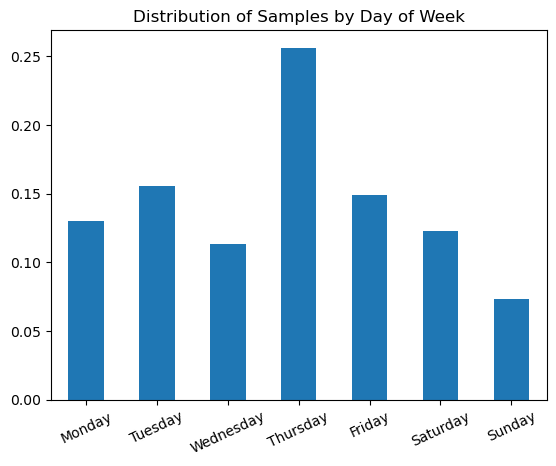

In [11]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
df.groupby('day')[['%dur']].sum().reindex(days).plot(kind='bar')
plt.xticks(rotation=25)
plt.xlabel('')
plt.legend('', frameon=False)
plt.title('Distribution of Samples by Day of Week')
plt.show()

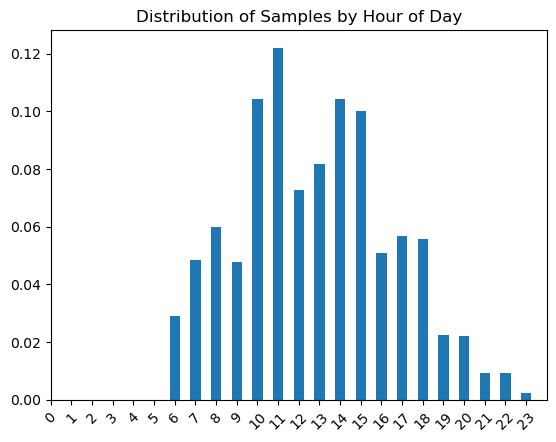

In [12]:
hours = range(0,24)
df.groupby('hour')[['%dur']].sum().reindex(hours).plot(kind='bar')
plt.xlim(left=0, right=24)
plt.xticks(rotation=45)
plt.xlabel('')
plt.legend('', frameon=False)
plt.title('Distribution of Samples by Hour of Day')
plt.show()

### Aircraft Features Summary

In [13]:
ac = df[df['class'] == 1]

In [14]:
ac.duration.describe()

count    625.000000
mean      51.104000
std        9.428734
min       18.000000
25%       47.000000
50%       53.000000
75%       60.000000
max       60.000000
Name: duration, dtype: float64

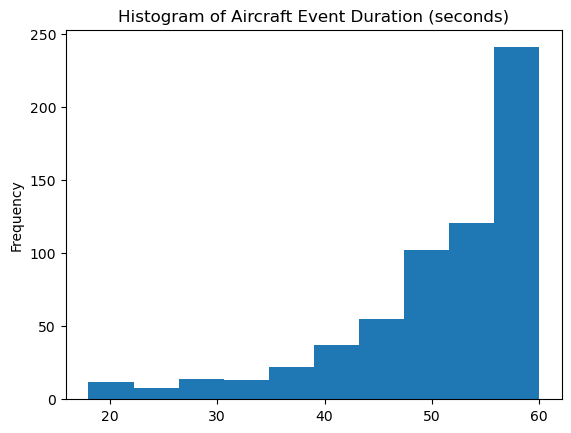

In [15]:
ac.duration.plot(kind='hist')
plt.title('Histogram of Aircraft Event Duration (seconds)')
plt.show()

In [16]:
ac['altitude'].describe()

count     625.000000
mean     3155.320000
std       714.395742
min      -225.000000
25%      2975.000000
50%      3250.000000
75%      3425.000000
max      5675.000000
Name: altitude, dtype: float64

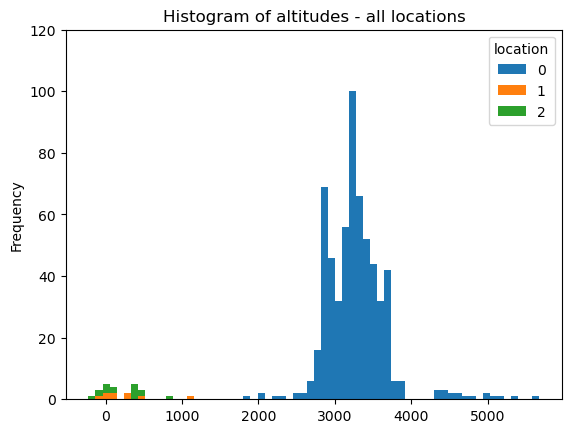

In [17]:
ac.pivot(columns='location').altitude.plot(kind = 'hist', stacked=True, bins=64)
plt.title('Histogram of altitudes - all locations')
plt.ylim(0,120)
plt.show()

In [18]:
ac['mtow'].describe()

count       625.000000
mean      62044.881600
std       56014.731948
min        1134.000000
25%       29574.000000
50%       73500.000000
75%       79015.000000
max      351800.000000
Name: mtow, dtype: float64

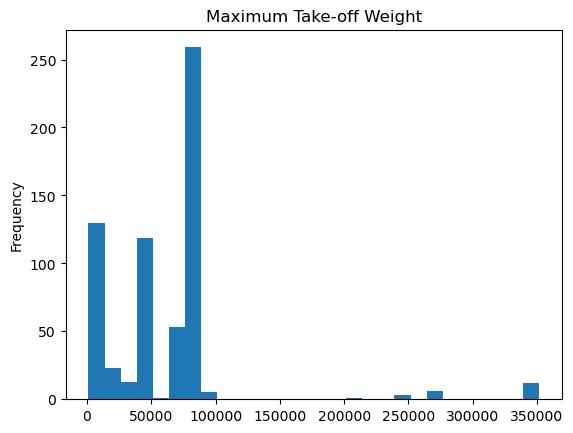

In [19]:
# uac = ac.drop_duplicates('hex_id')
ac.mtow.plot(kind = 'hist', stacked=True, bins=28)
plt.title('Maximum Take-off Weight')
#plt.ylim(0,120)
plt.show()

### n Most Frequent Values per Aircraft Feature

In [20]:
for col in ac.columns:
    if col in ['train-test', 'fold', 'filename', 'date', 'time', 'location', 
               'mic', 'class', 'subclass', 'session', 'offset', 'duration', 
               '%dur', 'file_length', 'reg', 'date_time', 'day', 'hour']:
        pass
    else:
        print(f'Column: {col}', '\n')
        print(pd.DataFrame(ac[col].value_counts()[:10]), '\n')
        print(f'N Unique values: {ac[col].nunique()}')
        print('\n')

Column: altitude 

      altitude
3275        43
3250        32
3300        32
2875        22
3100        21
3375        20
3350        19
2850        19
3075        18
3225        17 

N Unique values: 89


Column: hex_id 

        hex_id
7C7777      10
7C68CE       9
7C779A       8
7C2BEE       8
7C6C52       7
7C68D4       6
7C6D27       5
7C80AD       5
7C7526       5
7C752F       5 

N Unique values: 301


Column: airframe 

                        airframe
Power Driven Aeroplane       620
Rotorcraft                     5 

N Unique values: 2


Column: engtype 

            engtype
Turbofan        470
Turboprop       114
Piston           37
Turboshaft        4 

N Unique values: 4


Column: engnum 

   engnum
2     583
1      39
4       3 

N Unique values: 3


Column: shortdesc 

     shortdesc
L2J        467
L2T         86
L1T         28
L2P         26
L1P         10
H2T          4
L4J          3
H1P          1 

N Unique values: 8


Column: typedesig 

      typedesig
B738     

In [21]:
sil = df[df['class'] == 0]

In [22]:
sil.duration.describe()

count    1270.000000
mean        9.971654
std         0.175262
min         8.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: duration, dtype: float64

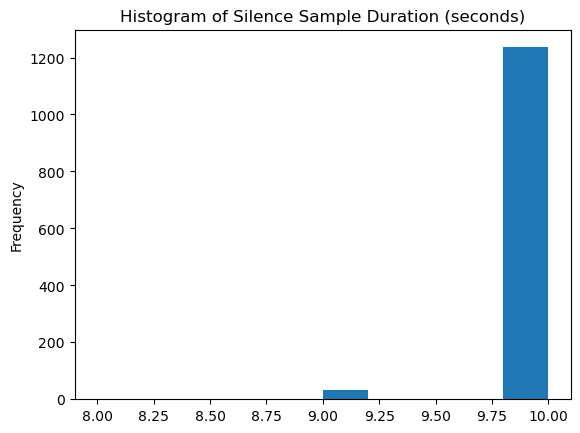

In [27]:
sil.duration.plot(kind='hist')
#plt.yscale('log')
plt.title('Histogram of Silence Sample Duration (seconds)')
plt.show()